# Изучение закономерностей, определяющих успешность игр

## Описание

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

<a id='1'></a>
## Изучение данных

[**К общему выводу ->**](#6)

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим и выведем кол-во пропусков по столбцам

In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<a id='2'></a>
## Обработка данных

[**К общему выводу ->**](#6)

Заменим названия столбцов (приведите к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()

пропуски в жанре и названии игры совпадают, плюс по этим играм в целом много пропусков, можно убрать эти 2 строчки польностью

In [6]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


данных по оценкам критиков не хватает много, игры есть как старые, так и совсем  новые.

In [7]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


тоже самое игры разные, года тоже

In [8]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


тоже самое игры разные, года тоже

In [9]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


есть игры с названием года выпуска (типо Madden NFL 2004, который должен был выйти в 2003), 
так же можно поробовать проверить не выходили игры с похожими названиями на других платформах, 
хотя релиз некоторых игр на разных платформах могут разделять годы

In [10]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


TBD - to be decided, значит что игре еще не выдан рейтинг, возможно пользовательских оценок еще слишком мало,  
чтобы вывести средний показатель - обычно есть какая-то граница по кол-ву оценок. Причин для этого может быть много.  
Заменим tpd на -1

In [11]:
data[data['user_score'] == 'tbd'] = -1

убираем две строки с пропущенными значениями в названии и жанре,   
заполняем пропуски по рейтингам значением -1,    
заполнение медианными или средними значениями по году/жанру не несет большого смысл,   
год выпуска так же заменим нулями и переведем в int  

In [12]:
data = data.dropna(axis=0, subset =['name'])
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1).astype('float')
data['rating'] = data['rating'].fillna('No Rating')
data['year_of_release'] = data['year_of_release'].fillna(-1).astype('int64')

In [13]:
#напримере первой же игры видим, что можно заполнить некоторые пропуски по году релиза взяв данные из других платформ
#data[data['name'] == 'Madden NFL 2004']
#for index in data[data['year_of_release'] == 0].index:
#    data['year_of_release'][index] = data.loc[data['name'] == data['name'][index], 'year_of_release'].max()
#def yor(row):
#    if row['year_of_release'] == -1:
#        row['year_of_release'] = data.loc[data['name'] == row['name'], 'year_of_release'].max()
#    return row
#data = data.apply(yor, axis = 1)
#data[data['name'] == 'FIFA Soccer 2004']

считаем продажи по всем регионам и добавляем новый столбец

In [14]:
#data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [15]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No Rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No Rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,No Rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,No Rating,28.31


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  sales            16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


**Вывод по обработке данных**


Привели названия колонок к нижнему регистру.  
Удалили 2 строки с пустыми названиями и жанрами, в которых было очень мало данных.  
Заменили пропуски в столбцах по рейтингам и годам на нули, до этого нулевых значений в этих столбцах не было.  
Менять значения на средние или медианные смысла не было, пропущенных значений слишком много.  
Учитывать "нули" при анализе данных не будем.  
'tbd' в 'user_score' так же заменили на ноль, т.к. фактически у игры рейтинга нет.  

<a id='3'></a>
## Исследовательский анализ данных

[**К общему выводу ->**](#6)

### Посмотрите, сколько игр выпускалось в разные годы.

Text(0, 0.5, 'Кол-во релизов')

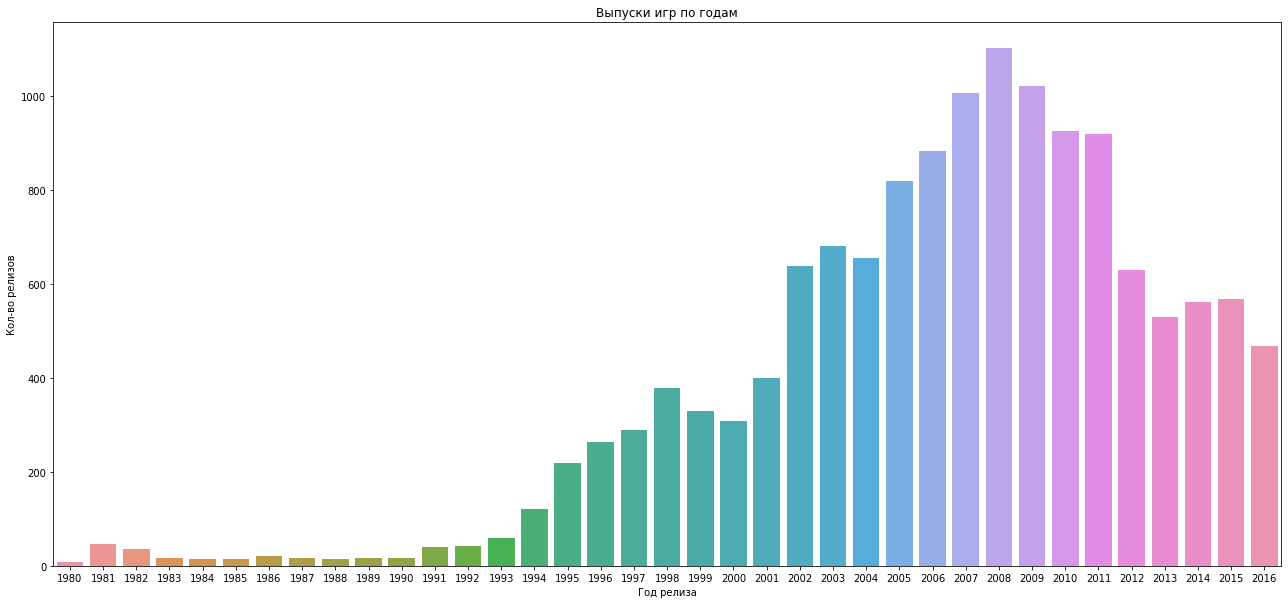

In [17]:
year = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc='count')
year = year[year.index != -1]
plt.figure(figsize=(22,10))
sns.barplot(x=year.index, y=year['name'])
plt.title("Выпуски игр по годам")
plt.xlabel("Год релиза")
plt.ylabel("Кол-во релизов")

в года ранее 2002 выпускалось мало игр и платформы уже устаревшие, обрежем период до 2002

In [18]:
data = data[data['year_of_release'] > 2001]

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

Text(0, 0.5, 'Количество продаж')

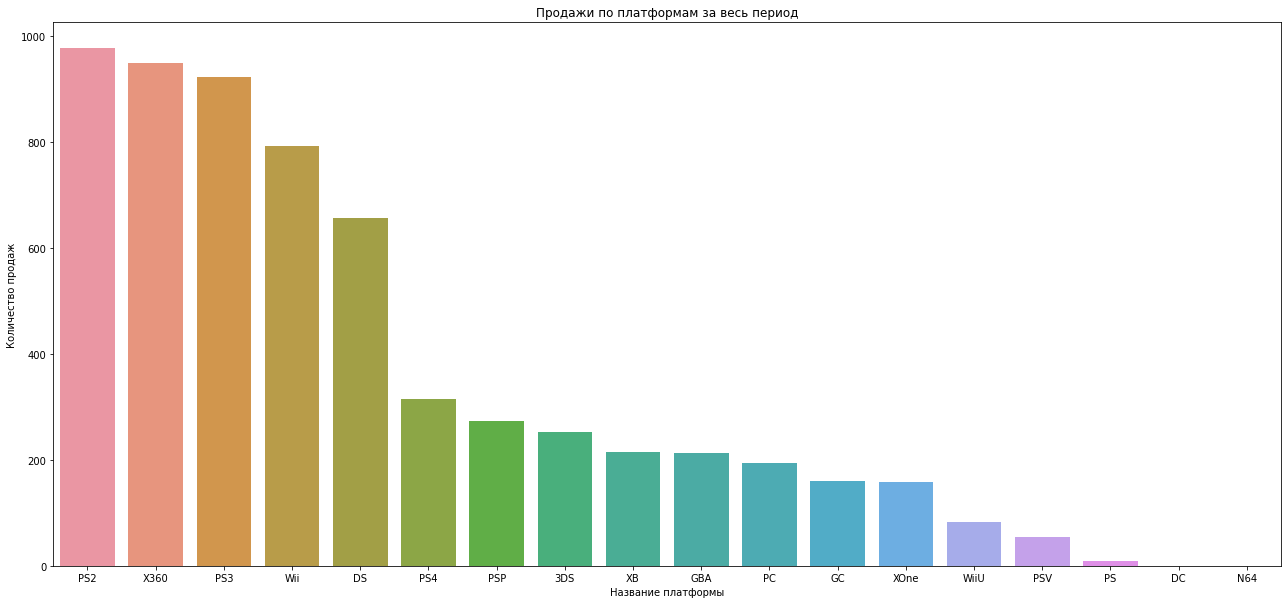

In [19]:
platform = data.pivot_table(index = 'platform', values = 'sales', aggfunc='sum').sort_values(by = 'sales', ascending = False)
platform = platform[platform.index != -1]
plt.figure(figsize=(22,10))
sns.barplot(x=platform.index, y=platform['sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

<AxesSubplot:title={'center':'Продажи по платформам за весь период'}, xlabel='Год'>

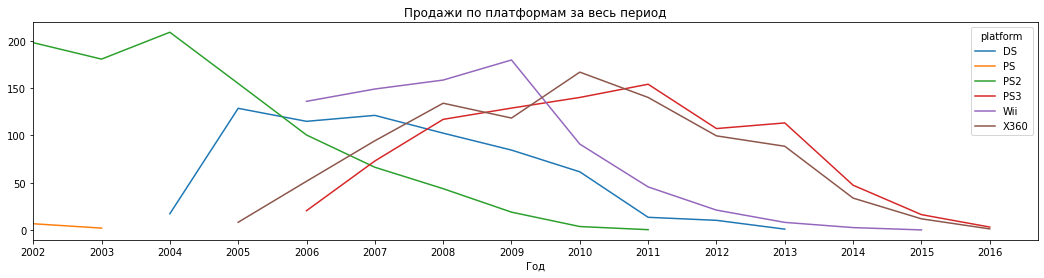

In [20]:
data_top_alltime = data.loc[(data['platform'] == 'PS2') | \
                    (data['platform'] == 'X360') | \
                    (data['platform'] == 'PS3') | \
                    (data['platform'] == 'Wii') | \
                    (data['platform'] == 'PS') | \
                    (data['platform'] == 'DS')]

data_top_alltime = data_top_alltime[data_top_alltime['year_of_release'] != -1]
data_top_alltime = data_top_alltime.pivot_table(index = 'year_of_release', columns = 'platform', values ='sales',aggfunc='sum')
data_top_alltime.plot(figsize=(18,4), title = 'Продажи по платформам за весь период', xlabel = 'Год',\
                      xticks=data_top_alltime.index, xlim=2002)

Обычно жизнь игровой консоли составляет 7-9 лет.

### Возьмите данные за соответствующий актуальный период.

продажи игр нет особого смысла смотреть дальше, чем на пару лет назад, индустрия развивается и меняется достаточно быстро, плюс в конце 2013 года вышли новые поколения игровых приставок Sony и Microsoft, стоит ограничить анализ 2012 - 2016 годами

In [21]:
data = data[data['year_of_release'] > 2011]

Text(0, 0.5, 'Количество продаж')

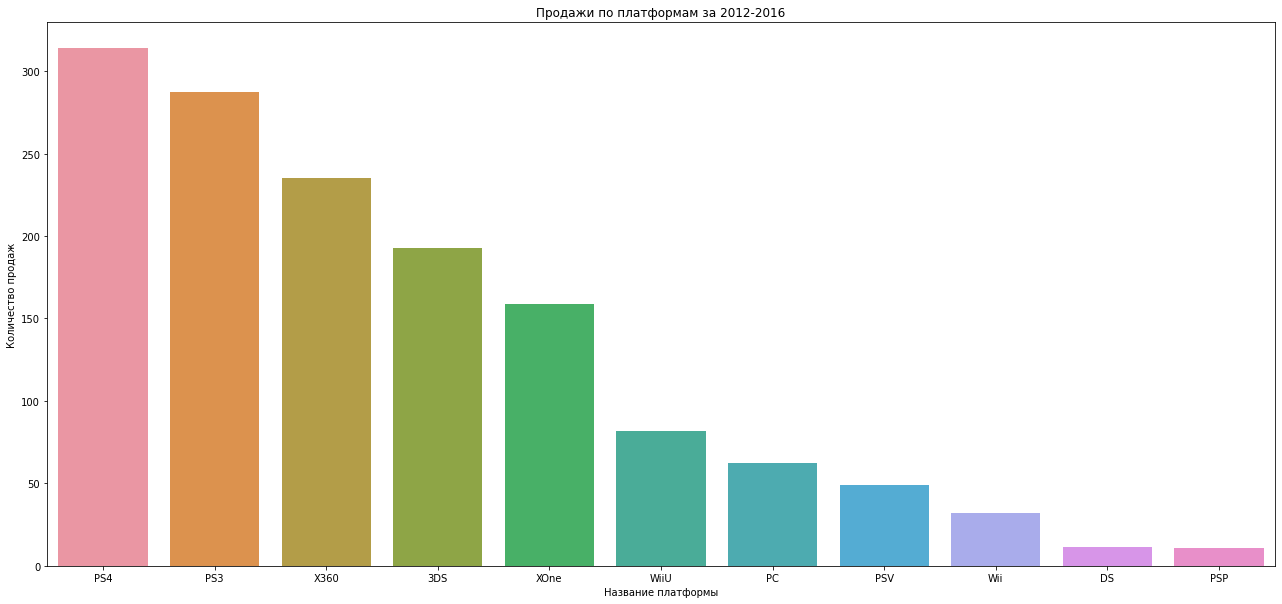

In [22]:
platform = data.pivot_table(index = 'platform', values = 'sales', aggfunc='sum').sort_values(by = 'sales', ascending = False)
platform = platform[platform.index != -1]
plt.figure(figsize=(22,10))
sns.barplot(x=platform.index, y=platform['sales'])
plt.title("Продажи по платформам за 2012-2016")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

<AxesSubplot:title={'center':'Продажи по платформам за 2012-2016'}, xlabel='Год'>

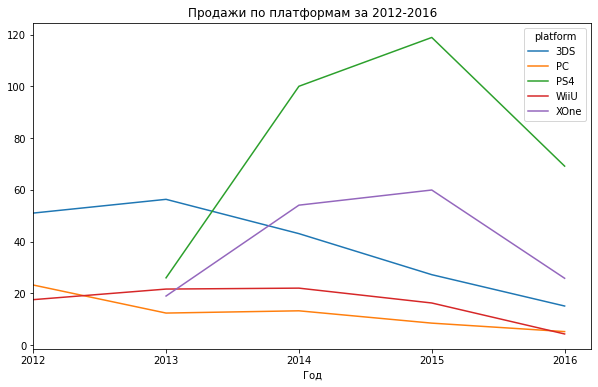

In [52]:
data_top = data.loc[(data['platform'] == 'PS4') | \
                    (data['platform'] == 'XOne') | \
                    (data['platform'] == 'PC') | \
                    (data['platform'] == '3DS') | \
                    (data['platform'] == 'WiiU')]

data_top = data_top[data_top['year_of_release'] != -1]
data_top_g = data_top.pivot_table(index = 'year_of_release', columns = 'platform', values ='sales',aggfunc='sum')
data_top_g.plot(figsize=(10,6), title = 'Продажи по платформам за 2012-2016', xlabel = 'Год',\
                      xticks=data_top_g.index, xlim=2012)

Т.к. 2016 год еще не закончился, то намс нужно понимать, что данные по нему неполные и будут только расти.  
Но уже можно сказать, что хоть X360, PS3, 3DS занимают высокие показатели продаж за последние годы, но их продажи падают и на них ставку делать не стоит.  
выделить можно PS4 и XOne как стабильные платформы с ростом

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [24]:
data_top.groupby('platform')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,367.0,0.525095,1.435539,0.01,0.0500,0.130,0.37,14.60
PC,245.0,0.255347,0.498548,0.01,0.0300,0.080,0.24,5.14
PS4,386.0,0.813472,1.618992,0.01,0.0600,0.200,0.73,14.63
WiiU,142.0,0.575986,1.073459,0.01,0.0825,0.235,0.56,7.09
XOne,236.0,0.672754,1.051848,0.01,0.0675,0.240,0.75,7.39


Text(0, 0.5, 'Количество продаж')

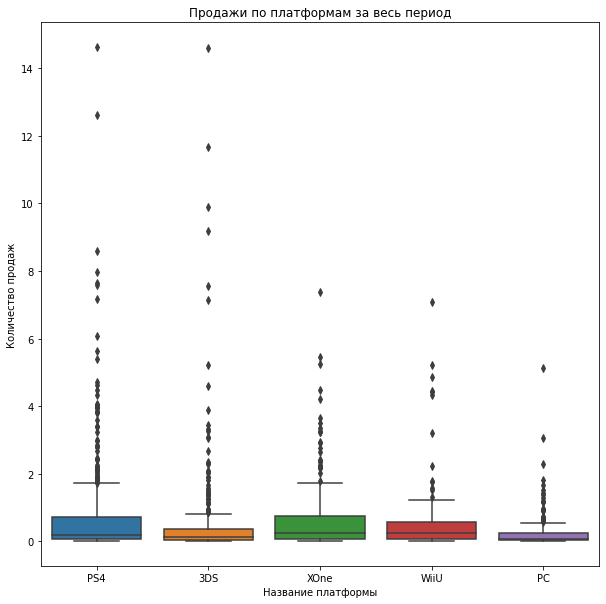

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(data = data_top,x='platform', y='sales')
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

(0.0, 2.0)

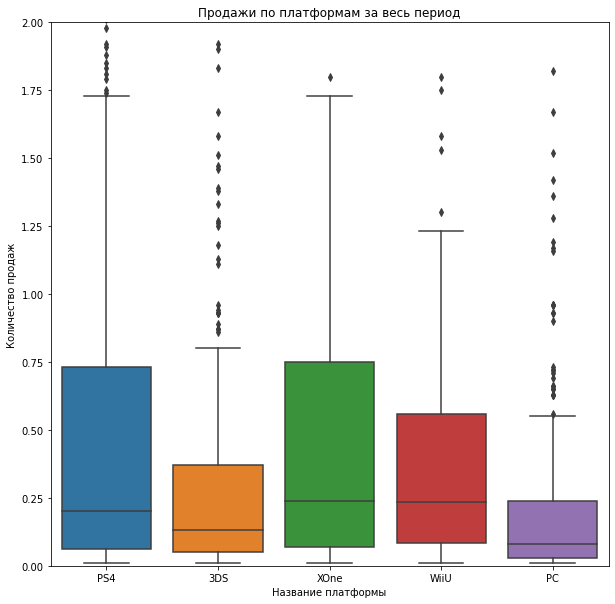

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(data = data_top,x='platform', y='sales')
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.ylim([0,2])

по граффикам понятно, что выбросов очень много, нужно отсечь лишнее.  
Медианные продажи низки у PC и 3DS, что закономерно.  
3DS уходит в прошлое, PC никогда не был полностью игровой платформой.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

In [27]:
PS4 = data.loc[(data['platform'] == 'PS4') & (data['user_score'] != -1)]
PS4['user_score'].corr(PS4['sales'])

-0.031957110204556376

Text(0, 0.5, 'Продажи')

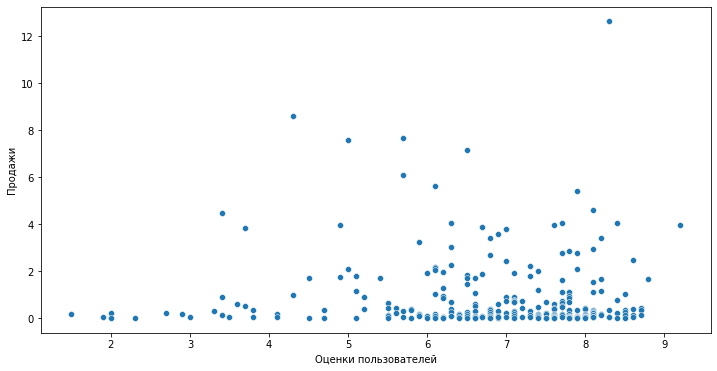

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='sales', data = PS4)
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")

In [29]:
PS4 = data.loc[(data['platform'] == 'PS4') & (data['critic_score'] != 0)]
PS4['critic_score'].corr(PS4['sales'])

0.2242803352937992

Text(0, 0.5, 'Продажи')

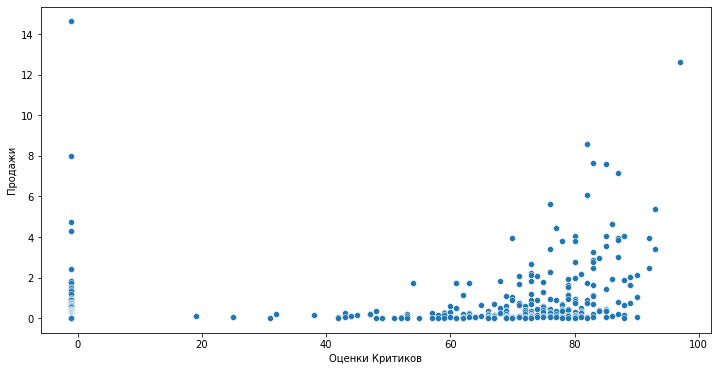

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='sales', data = PS4)
plt.xlabel("Оценки Критиков")
plt.ylabel("Продажи")

Судя по графику может сложиться впечатлени, что лучше продаются игры с хорошими отзывами и оценками.
Однако такое впечатление складывается из-за того, что игры в целом редко получают оценки ниже определенного уровня.  
С уверенностью можно сказать, что для PS4 есть зависимость только от оценок критиков, но она не очень сильная.  
Зависимости от оценки пользователей нет.

### Соотнесите выводы с продажами игр на других платформах.

In [31]:
def co_check (name):
    corr_crit_rat = []
    corr_crit_rat = []
    platform_user = data_top.loc[(data_top['platform'] == name) & (data_top['user_score'] != 0)]
    platform_crit = data_top.loc[(data_top['platform'] == name) & (data_top['critic_score'] != 0)]
    corr_user = platform_user['user_score'].corr(platform_user['sales'])
    if platform_crit['platform'].count() == 1:
        corr_crit = 0
    else:
        corr_crit = platform_crit['critic_score'].corr(platform_crit['sales'])
    
    if (corr_crit >= 0.8) or (corr_crit <= -0.8):
        corr_crit_rat = 'Большая'
    elif -0.3 <= corr_crit <= 0.3:
        corr_crit_rat = 'Низкая'
    elif (0.3 < corr_crit < 0.8) or (-0.3 < corr_crit < -0.8):
        corr_crit_rat = 'Средняя'   
        
    if (corr_user >= 0.8) or (corr_user <= -0.8):
        corr_user_rat = 'Большая'
    elif -0.3 <= corr_user <= 0.3:
        corr_user_rat = 'Низкая'
    elif (0.3 < corr_user < 0.8) or (-0.3 > corr_user > -0.8):
        corr_user_rat = 'Средняя'     
        
    if corr_user >= 0:
        corr_user_p = 'положительная' 
    else:
        corr_user_p = 'отрицательная'
    
    if corr_crit >= 0:
        corr_crit_p = 'положительная' 
    else:
        corr_crit_p = 'отрицательная'
        
    
    return print('\nПлатформа:', name,'\nкорреляция юзеров:',"{:.2%}".format(corr_user),
                 '\nЗависимость от оценки пользователей -', corr_user_rat, corr_user_p,
                 '\nкорреляция критиков:',"{:.2%}".format(corr_crit),
                 '\nЗависимость от оценки критиков -', corr_crit_rat, corr_crit_p)    

for i in data_top['platform'].unique():
    co_check(i)
    print('')



Платформа: PS4 
корреляция юзеров: 10.77% 
Зависимость от оценки пользователей - Низкая положительная 
корреляция критиков: 22.43% 
Зависимость от оценки критиков - Низкая положительная


Платформа: 3DS 
корреляция юзеров: 11.49% 
Зависимость от оценки пользователей - Низкая положительная 
корреляция критиков: 14.49% 
Зависимость от оценки критиков - Низкая положительная


Платформа: XOne 
корреляция юзеров: 8.51% 
Зависимость от оценки пользователей - Низкая положительная 
корреляция критиков: 25.92% 
Зависимость от оценки критиков - Низкая положительная


Платформа: WiiU 
корреляция юзеров: 24.62% 
Зависимость от оценки пользователей - Низкая положительная 
корреляция критиков: 29.10% 
Зависимость от оценки критиков - Низкая положительная


Платформа: PC 
корреляция юзеров: 3.55% 
Зависимость от оценки пользователей - Низкая положительная 
корреляция критиков: 19.30% 
Зависимость от оценки критиков - Низкая положительная



проверим, достаточно ли данных по каждой платформе.

In [32]:
data_top['platform'].value_counts()

PS4     386
3DS     367
PC      245
XOne    236
WiiU    142
Name: platform, dtype: int64

### Посмотрите на общее распределение игр по жанрам. 

In [33]:
genre_pivot = data_top.pivot_table(index='genre',values = 'sales', aggfunc ='median').sort_values(by = 'sales', ascending = False)
genre_pivot

,sales
genre,
Shooter,0.490
Platform,0.260
Sports,0.260
Role-Playing,0.205
Misc,0.180
Fighting,0.155
Simulation,0.145
Action,0.130
Racing,0.120


Больше всего продаж у Action, Shooter и RPG, меньше всего пазлов и стратегий.  
Однако, если мы смотрим медианные значения, то картина несколько меняется - у Шутеров почти в 2 раза больше продаж.  
Так же второе место начинают занимать платформеры.

Text(0, 0.5, 'Медиана продаж')

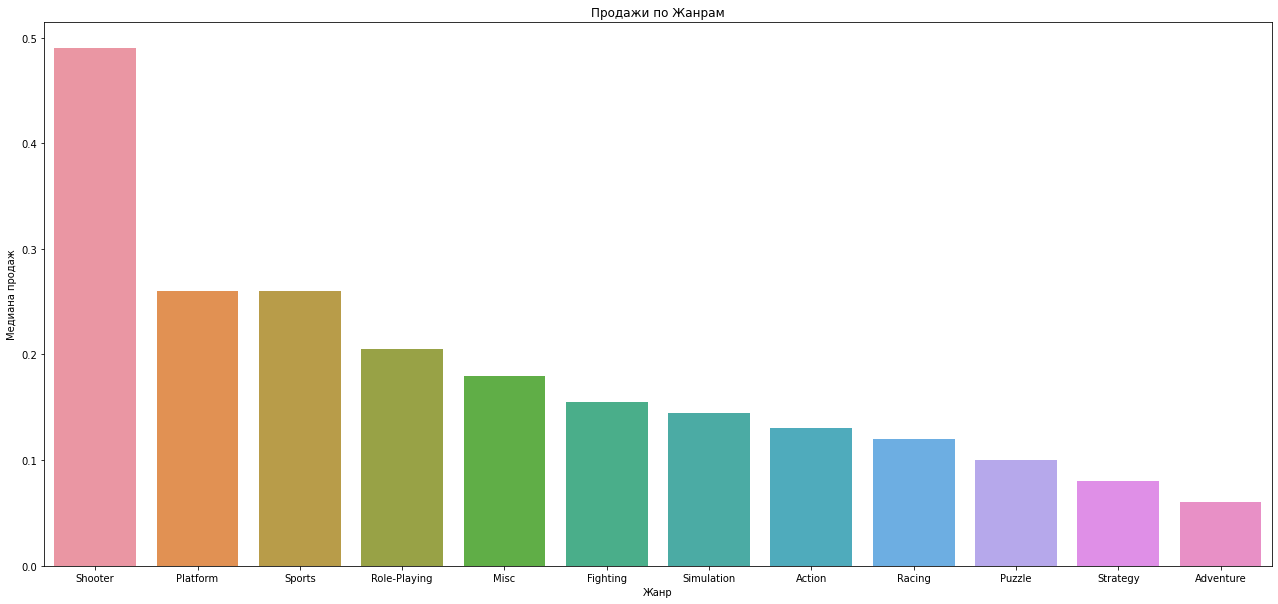

In [34]:
plt.figure(figsize=(22,10))
sns.barplot(x = genre_pivot.index,y = genre_pivot['sales'])
plt.title("Продажи по Жанрам")
plt.xlabel("Жанр")
plt.ylabel("Медиана продаж")


<a id='4'></a>
## Составьте портрет пользователя каждого региона

[**К общему выводу ->**](#6)

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

,eu_sales,jp_sales,na_sales
platform,,,
3DS,41.64,87.68,54.65
PC,37.67,0.00,19.12
PS4,141.09,15.96,108.62
WiiU,24.97,13.01,37.90
XOne,51.43,0.34,92.77


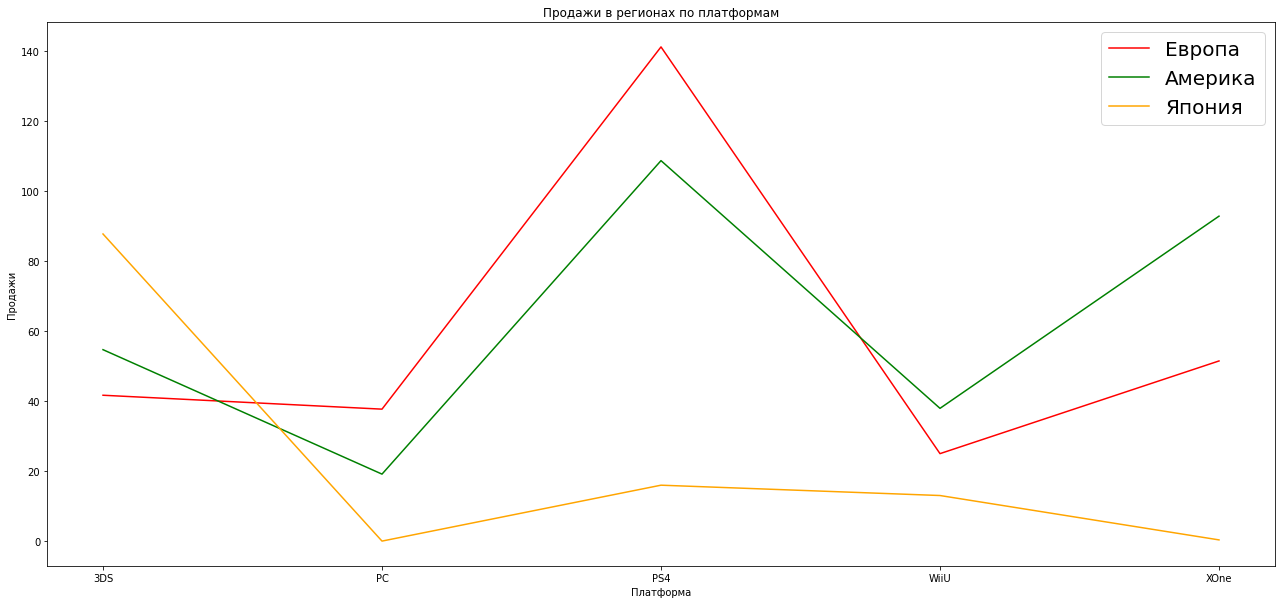

In [35]:
sss = data_top.pivot_table(index = 'platform', values = ['na_sales' ,'eu_sales', 'jp_sales'], aggfunc = 'sum')
plt.figure(figsize=(22,10))
plt.plot(sss.index.values, sss['eu_sales'], label = 'Европа', color = 'red')
plt.plot(sss.index.values, sss['na_sales'], label = 'Америка', color = 'green')
plt.plot(sss.index.values, sss['jp_sales'], label = 'Япония', color = 'orange')
plt.title("Продажи в регионах по платформам")
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.legend(fontsize = 20)
sss

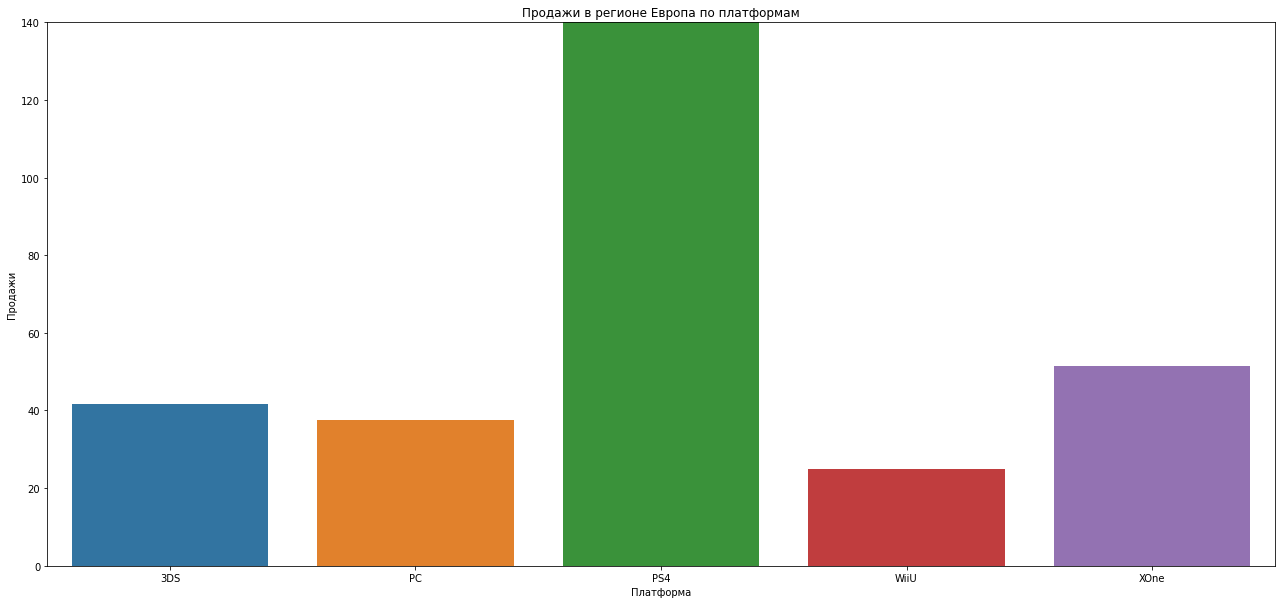

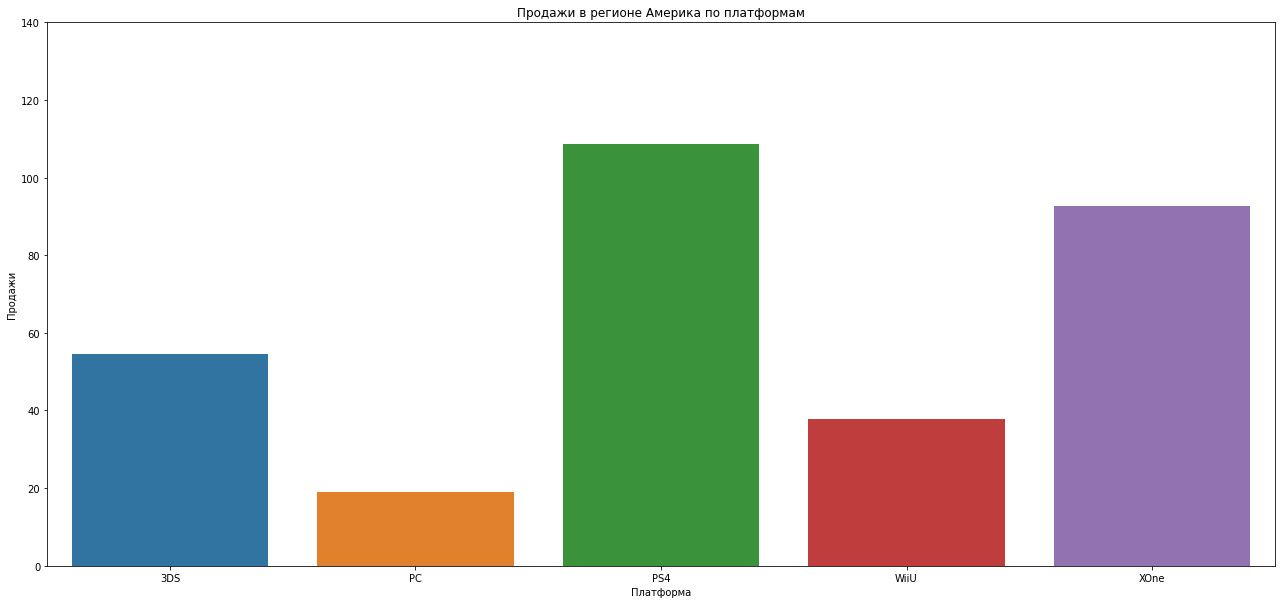

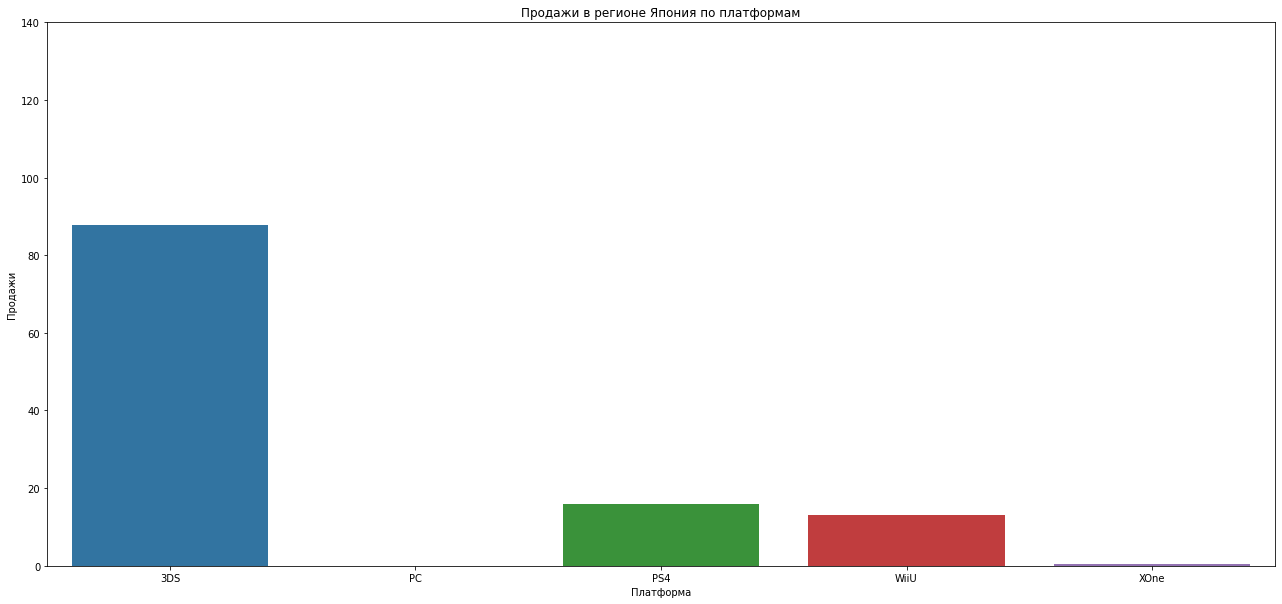

In [36]:
for x in ['eu_sales', 'na_sales', 'jp_sales']:
    if x == 'eu_sales':
        r = 'Европа'
    elif x == 'na_sales':
        r = 'Америка'
    elif x == 'jp_sales':
        r = 'Япония'
    plt.figure(figsize=(22,10))
    sns.barplot(x = sss.index.values, y = sss[x])
    plt.title(f"Продажи в регионе {r} по платформам")
    plt.xlabel("Платформа")
    plt.ylabel("Продажи")
    plt.ylim(0,140)

В Америке лидурует старая X360, но уже видно, что в этот раз соперничество между Sony и Microsoft будет сложнее для Microsoft.  
В Европе уже преобладает Playstation.  
В Японии свои позиции все еще удерживает 3DS, однако ставку на него делать не стоит, продажи за последние годы упали на треть.

### Самые популярные жанры (топ-5). Поясните разницу.

In [37]:
ggg = data_top.pivot_table(index = 'genre', values = ['na_sales' ,'eu_sales', 'jp_sales'], aggfunc = 'sum')
ggg

,eu_sales,jp_sales,na_sales
genre,,,
Action,78.35,27.50,81.59
Adventure,5.33,3.21,3.93
Fighting,6.58,4.74,12.05
Misc,11.22,8.24,15.10
Platform,16.58,8.49,20.02
Puzzle,1.24,1.39,1.06
Racing,15.78,1.61,10.61
Role-Playing,37.20,43.38,44.79
Shooter,66.67,4.58,76.70


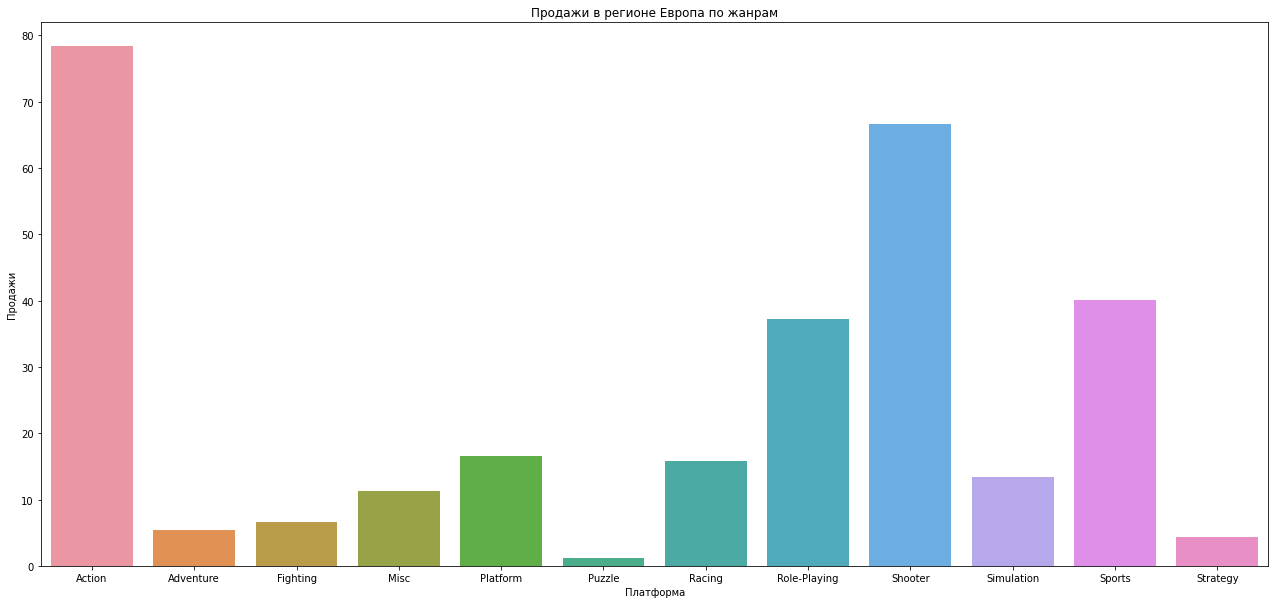

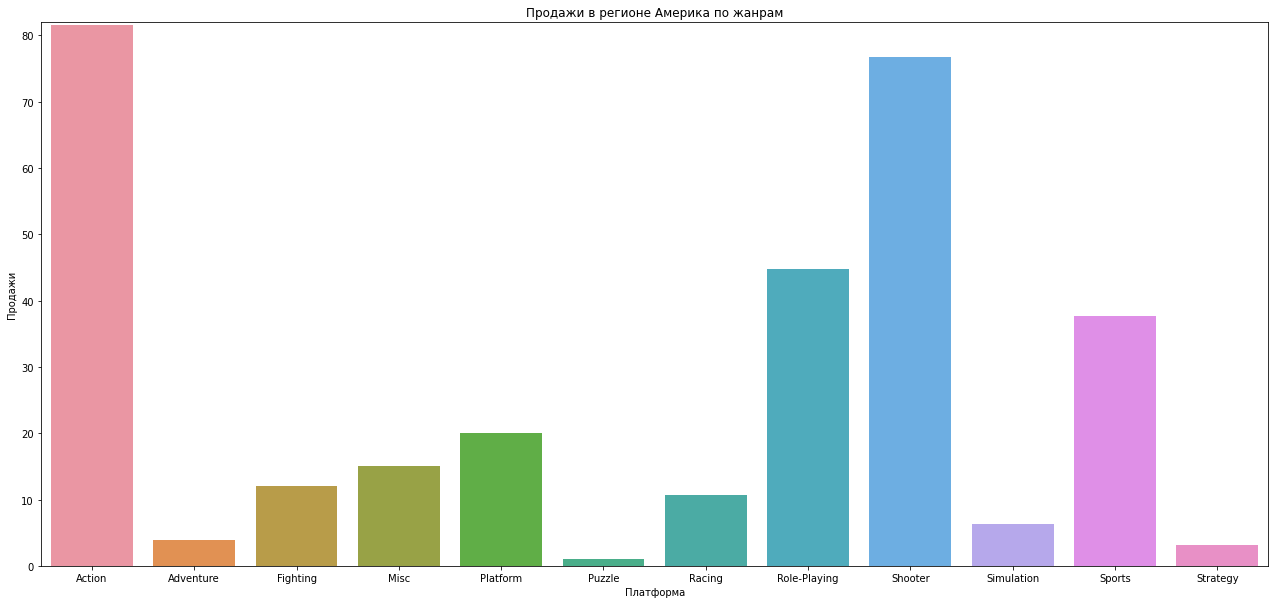

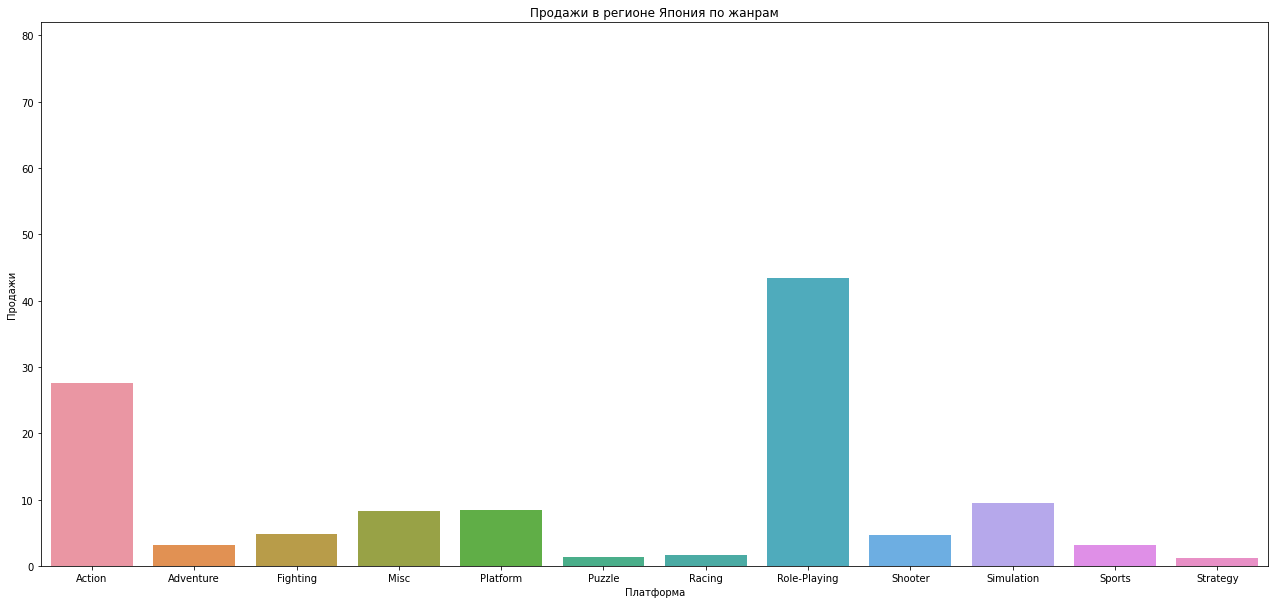

In [38]:
for x in ['eu_sales', 'na_sales', 'jp_sales']:
    if x == 'eu_sales':
        r = 'Европа'
    elif x == 'na_sales':
        r = 'Америка'
    elif x == 'jp_sales':
        r = 'Япония'
    plt.figure(figsize=(22,10))
    sns.barplot(x = ggg.index.values, y = ggg[x])
    plt.title(f"Продажи в регионе {r} по жанрам")
    plt.xlabel("Платформа")
    plt.ylabel("Продажи")
    plt.ylim(0,82)

В Европе и Америке преобладает традиционная тройка: Спорт, Экшен, Шутер.  
В Японии на первом месте RPG, ожидаемо для страны-изобреталетя jRPG.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [39]:
data_top.pivot_table(index = 'rating', values = ['na_sales' ,'eu_sales', 'jp_sales'], aggfunc = 'sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,67.04,23.83,63.58
E10+,27.81,7.24,38.41
M,101.37,7.20,102.76
No Rating,66.16,69.14,71.07
T,34.42,9.58,37.24


рейтинг M (18-21+) - преобладает в Америке и Европе , но занимает очень низкую позицию в Японии.
рейтинг E (для всех) - занимает в Америке и Европе второй местро, Японии такой рейтинг на первом месте.
Так же стоит заметить, что я в Японии много игр, которые вообще не получают рейтинг (нулевых).

<a id='5'></a>
## Проверьте гипотезы

[**К общему выводу ->**](#6)

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые.

In [40]:
xone = data[(data['platform'] == 'XOne') & (data['user_score'] != -1)]['user_score']
pc = data[(data['platform'] == 'PC') & (data['user_score'] != -1) & (data['year_of_release'] != 2012)]['user_score']

alpha = .05

results = st.ttest_ind(xone, pc, equal_var=False)

print('alpha:', "{:.2%}".format(alpha))
print('p-значение:', "{:.2%}".format(results.pvalue))


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

alpha: 5.00%
p-значение: 14.76%
Не получилось отвергнуть нулевую гипотезу


In [41]:
# код ревьюера
data[(data['platform'] == 'XOne') & (data['user_score'] != 0)].head(5).year_of_release.unique()

array([2015, 2014])

In [42]:
data[(data['platform'] == 'XOne') & (data['user_score'] != -1)].year_of_release.unique()

array([2014, 2015, 2013, 2016])

In [43]:
data[(data['platform'] == 'XOne') & (data['user_score'] != -1)]['user_score'].count()

182

In [44]:
data[(data['platform'] == 'XOne') & (data['user_score'] != -1)]['user_score'].median()

6.8

In [45]:
data[(data['platform'] == 'PC') & (data['user_score'] != -1) & (data['year_of_release'] != 2012)].year_of_release.unique()

array([2014, 2013, 2015, 2016])

In [46]:
data[(data['platform'] == 'PC') & (data['user_score'] != -1) & (data['year_of_release'] != 2012)]['user_score'].count()

155

In [47]:
data[(data['platform'] == 'PC') & (data['user_score'] != -1) & (data['year_of_release'] != 2012)]['user_score'].median()

6.8

Вывод: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») совпадают.  
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [48]:
action = data[(data['genre'] == 'Action') & (data['user_score'] != 0)]['user_score']
sports = data[(data['genre'] == 'Sports') & (data['user_score'] != 0)]['user_score']

alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)

print('alpha:', "{:.2%}".format(alpha))
print('p-значение:', "{:.2%}".format(results.pvalue))


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

alpha: 5.00%
p-значение: 0.02%
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<a id='6'></a>
## Общий вывод

[**1 Изучение данных**](#1)  
  
Ознакомились с данным, посмотрели на общее инфо и пропуски.  
  
[**2 Обработка данных**](#2)  
  
Поправили названия столбцов.  
Убрали 2 строчки с данными, где не было одновременно названий, жанров, ретийнгов и оценок игр.
Рассмотрели подробно пропуски по рейтингам, оценкам и годам, где возможно доработали данные, где нет - проставили 'нули'.
Изменили тип данных для некоторых столбцов. 
  
[**3 Исследовательский анализ данных**](#3)  
  
Пик выходов видео игр приходиться на 2005-2011 годы, можно связать это с рассцветом предыдущих поколений консолей.  
Самые большие продажи игр за все время на PS2, далее PS3 и X360.  
Обычно жизнь игровой консоли составляет 7-9 лет.  
  
Для дальнейшего анализа взяли период 2012-2016.  
Оценки пользователей и критиков по разному влияют на продажи игр платформы.  
Лидеры за этот период, PS3, PS4, XOne, X360, 3DS, WiiU, PC.  
Однако рассматривать PS3 и X360 рассматривать смысла особого нет, т.к. их продажи сократились из-за нового поколения.  
(3DS, WiiU тоже особого смысла рассматривать нет, но оставили их для сравнения.)
  
Зависимость оценок пользователей и критиков меняется в зависимости от платформы.  
стоит отметить несколько флагманских платформ:  
  
Платформа: PS4  
корреляция юзеров: 10.77%   
Зависимость от оценки пользователей - Низкая положительная   
корреляция критиков: 22.43%   
Зависимость от оценки критиков - Низкая положительная  
  
Платформа: 3DS   
корреляция юзеров: 11.49%   
Зависимость от оценки пользователей - Низкая положительная  
корреляция критиков: 14.49%   
Зависимость от оценки критиков - Низкая положительная  
  
Платформа: XOne  
корреляция юзеров: 8.51%  
Зависимость от оценки пользователей - Низкая положительная  
корреляция критиков: 25.92%  
Зависимость от оценки критиков - Низкая положительная 
  
Платформа: WiiU  
корреляция юзеров: 24.62%  
Зависимость от оценки пользователей - Низкая положительная  
корреляция критиков: 29.10%  
Зависимость от оценки критиков - Низкая положительная 
  
Платформа: PC  
корреляция юзеров: 3.55%  
Зависимость от оценки пользователей - Низкая положительная  
корреляция критиков: 19.30%  
Зависимость от оценки критиков - Низкая положительная 
  
[**4 Составьте портрет пользователя каждого региона**](#4)  
  
За 2012-2016  
В Америке лидурует старая X360, но уже видно, что в этот раз соперничество между Sony и Microsoft будет сложнее для Microsoft.    
  
В Европе уже преобладает Playstation.  
В Японии свои позиции все еще удерживает 3DS, однако ставку на него делать не стоит, продажи за последние годы упали на треть.  
  
В Европе и Америке преобладает традиционная тройка: Спорт, Экшен, Шутер.  
В Японии на первом месте RPG, ожидаемо для страны-изобреталетя jRPG.  
Однако, если мы смотрим медианные значения, то картина несколько меняется - у Шутеров почти в 2 раза больше продаж.   
Так же второе место начинают занимать платформеры.  
  
рейтинг M (18-21+) - преобладает в Америке и Европе , но занимает очень низкую позицию в Японии.  
рейтинг E (для всех) - занимает в Америке и Европе второй местро, Японии такой рейтинг на первом месте.  
Так же стоит заметить, что я в Японии много игр, которые вообще не получают рейтинг (нулевых).  
  
[**5 Проверьте гипотезы**](#5)  
  
Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые.  
  
alpha: 5.00%  
p-значение: 14.76%  
Не получилось отвергнуть нулевую гипотезу  
Вывод: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
  
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») совпадают.  
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
  
alpha: 5.00%  
p-значение: 0.02% 
Отвергаем нулевую гипотезу  
Вывод: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  